In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("../Data/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

Text(0, 0.5, 'Salary')

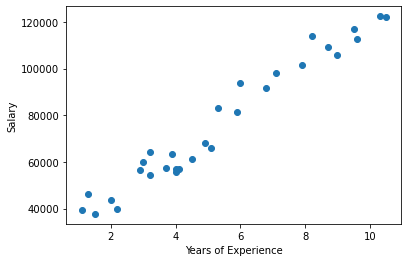

In [8]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [12]:
x=df[["YearsExperience"]]
y=df["Salary"]

In [14]:
#model creation
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [15]:
#b1
model.coef_

array([9449.96232146])

In [16]:
#b0
model.intercept_

25792.20019866871

In [17]:
ypred=model.predict(x)

In [19]:
df["Predictions"]=ypred

In [20]:
df

,YearsExperience,Salary,Predictions
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [21]:
# R square
model.score(x,y)

0.9569566641435086

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(y,ypred)
mae

4644.2012894435375

In [24]:
mse=mean_squared_error(y,ypred)
mse

31270951.722280968

In [25]:
rmse=np.sqrt(mse)
rmse

5592.043608760662

In [26]:
r2_score(y,ypred)

0.9569566641435086

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [30]:
xtrain.shape

(21, 1)

In [31]:
xtest.shape

(9, 1)

In [36]:
#fit model with training data
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [37]:
#testing test data
ypred=model.predict(xtest)

In [38]:
output=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
output

,Actual,Predicted
8,64445.0,53660.739833
17,83088.0,73791.181819
3,43525.0,42157.630127
27,112635.0,115010.658268
19,93940.0,80501.329148
6,60150.0,51743.554882
20,91738.0,88170.068953
23,113812.0,101590.363610
0,39343.0,33530.297847


In [39]:
r2_score(ytest,ypred)

0.8928620728250394

In [40]:
mean_squared_error(ytest,ypred)

73044086.25687581

In [41]:
mean_absolute_error(ytest,ypred)

7474.610227620485

In [42]:
np.sqrt(mean_squared_error(ytest,ypred))

8546.583308953106